# Zyfra - Gold Recovery Project

## Introduction

We will be preparing a prototype of a machine learning model for Zyfra, a company develops efficiency solutions for heavy industry. The model should predict the amount of gold recovered from gold ore, given the data on extraction and purification.

We will apply different models (Random Forest Regressor, Linear Regression, and Decision Tree Regressor) and picking the best one based on the lowest sMAPE (evaluation metric) value.

## Preprocessing Data

In [2]:
# Import Libraries

import pandas as pd
import numpy as np

from sklearn.metrics import mean_absolute_error
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

In [3]:
# Download dataset

# Training Dataset
training_data = pd.read_csv('/datasets/gold_recovery_train.csv')

# Test Dataset
test_data = pd.read_csv('/datasets/gold_recovery_test.csv')

#Source Dataset
full_data = pd.read_csv('/datasets/gold_recovery_full.csv')

In [4]:
# Check data types 

print(training_data.info())
training_data.sample(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                16860 non-null  object 
 1   final.output.concentrate_ag                         16788 non-null  float64
 2   final.output.concentrate_pb                         16788 non-null  float64
 3   final.output.concentrate_sol                        16490 non-null  float64
 4   final.output.concentrate_au                         16789 non-null  float64
 5   final.output.recovery                               15339 non-null  float64
 6   final.output.tail_ag                                16794 non-null  float64
 7   final.output.tail_pb                                16677 non-null  float64
 8   final.output.tail_sol                               16715 non-null  float64


,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16855,2018-08-18 06:59:59,3.224920,11.356233,6.803482,46.713954,73.755150,8.769645,3.141541,10.403181,1.529220,...,23.031497,-501.167942,20.007571,-499.740028,18.006038,-499.834374,13.001114,-500.155694,20.007840,-501.296428
16856,2018-08-18 07:59:59,3.195978,11.349355,6.862249,46.866780,69.049291,8.897321,3.130493,10.549470,1.612542,...,22.960095,-501.612783,20.035660,-500.251357,17.998535,-500.395178,12.954048,-499.895163,19.968498,-501.041608
16857,2018-08-18 08:59:59,3.109998,11.434366,6.886013,46.795691,67.002189,8.529606,2.911418,11.115147,1.596616,...,23.015718,-501.711599,19.951231,-499.857027,18.019543,-500.451156,13.023431,-499.914391,19.990885,-501.518452
16858,2018-08-18 09:59:59,3.367241,11.625587,6.799433,46.408188,65.523246,8.777171,2.819214,10.463847,1.602879,...,23.024963,-501.153409,20.054122,-500.314711,17.979515,-499.272871,12.992404,-499.976268,20.013986,-500.625471


In [5]:
# Check for missing values

print(training_data.isna().sum())
print(test_data.isna().sum())

date                                            0
final.output.concentrate_ag                    72
final.output.concentrate_pb                    72
final.output.concentrate_sol                  370
final.output.concentrate_au                    71
                                             ... 
secondary_cleaner.state.floatbank5_a_level     85
secondary_cleaner.state.floatbank5_b_air       85
secondary_cleaner.state.floatbank5_b_level     84
secondary_cleaner.state.floatbank6_a_air      103
secondary_cleaner.state.floatbank6_a_level     85
Length: 87, dtype: int64
date                                            0
primary_cleaner.input.sulfate                 302
primary_cleaner.input.depressant              284
primary_cleaner.input.feed_size                 0
primary_cleaner.input.xanthate                166
primary_cleaner.state.floatbank8_a_air         16
primary_cleaner.state.floatbank8_a_level       16
primary_cleaner.state.floatbank8_b_air         16
primary_cleaner.state.flo

Since the number of missing values is very little compared to the size of the dataset (less than 2.5% for the columns with the most missing values), the data with missing values is dropped

In [6]:
# Handling missing values

training_data = training_data.dropna()
test_data = test_data.dropna()

print(training_data.isna().sum())


date                                          0
final.output.concentrate_ag                   0
final.output.concentrate_pb                   0
final.output.concentrate_sol                  0
final.output.concentrate_au                   0
                                             ..
secondary_cleaner.state.floatbank5_a_level    0
secondary_cleaner.state.floatbank5_b_air      0
secondary_cleaner.state.floatbank5_b_level    0
secondary_cleaner.state.floatbank6_a_air      0
secondary_cleaner.state.floatbank6_a_level    0
Length: 87, dtype: int64


In [7]:
# Check for duplicates

print(training_data.duplicated().sum())

0


In [6]:
# Calculate recovery 

training_data['calculated_recovery'] = (training_data['rougher.output.concentrate_au'] * (training_data['rougher.input.feed_au'] - training_data['rougher.output.tail_au'])) / (training_data['rougher.input.feed_au'] * (training_data['rougher.output.concentrate_au'] - training_data['rougher.output.tail_au'])) * 100

mae = mean_absolute_error(training_data['rougher.output.recovery'], training_data['calculated_recovery'])

print('MAE:', mae)
   

MAE: 9.460144184559453e-15


/tmp/ipykernel_49/1293119985.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training_data['calculated_recovery'] = (training_data['rougher.output.concentrate_au'] * (training_data['rougher.input.feed_au'] - training_data['rougher.output.tail_au'])) / (training_data['rougher.input.feed_au'] * (training_data['rougher.output.concentrate_au'] - training_data['rougher.output.tail_au'])) * 100


The MAE between the calculted recovery and the output from the dataset is quite low, so any models we apply should have a lower MAE for the model to make sense.

In [7]:
# Features not available in test set

# Identify features in train that are not in test
missing_features = set(training_data.columns) - set(test_data.columns)

# Print out the missing features and their types
for feature in missing_features:
    print(f"Feature: {feature}, Type: {training_data[feature].dtype}")


Feature: calculated_recovery, Type: float64
Feature: primary_cleaner.output.tail_ag, Type: float64
Feature: final.output.concentrate_au, Type: float64
Feature: final.output.tail_au, Type: float64
Feature: rougher.calculation.floatbank11_sulfate_to_au_feed, Type: float64
Feature: rougher.calculation.floatbank10_sulfate_to_au_feed, Type: float64
Feature: secondary_cleaner.output.tail_ag, Type: float64
Feature: rougher.output.tail_sol, Type: float64
Feature: final.output.tail_pb, Type: float64
Feature: rougher.output.tail_ag, Type: float64
Feature: rougher.calculation.sulfate_to_au_concentrate, Type: float64
Feature: secondary_cleaner.output.tail_sol, Type: float64
Feature: primary_cleaner.output.tail_au, Type: float64
Feature: primary_cleaner.output.tail_sol, Type: float64
Feature: primary_cleaner.output.tail_pb, Type: float64
Feature: rougher.output.concentrate_sol, Type: float64
Feature: final.output.recovery, Type: float64
Feature: rougher.calculation.au_pb_ratio, Type: float64
Featur

The above features are not present in the test dataset, and all have the float64 datatype. As it can be seen, the features missing from the test set has to do with silver (ag) and lead (pb), because technically these values shouldn't impact predicting the amount of gold extracted which is the purpose of this project.

In [8]:
# Scaling numerical features
scaler = StandardScaler()
training_features = training_data.drop('date', axis=1)
training_features_scaled = scaler.fit_transform(training_features)

Data Scaling made the sMAPE value a lot higher so the scaled data is not used, instead the original was.

## Data Analysis

### Concentration of Metals

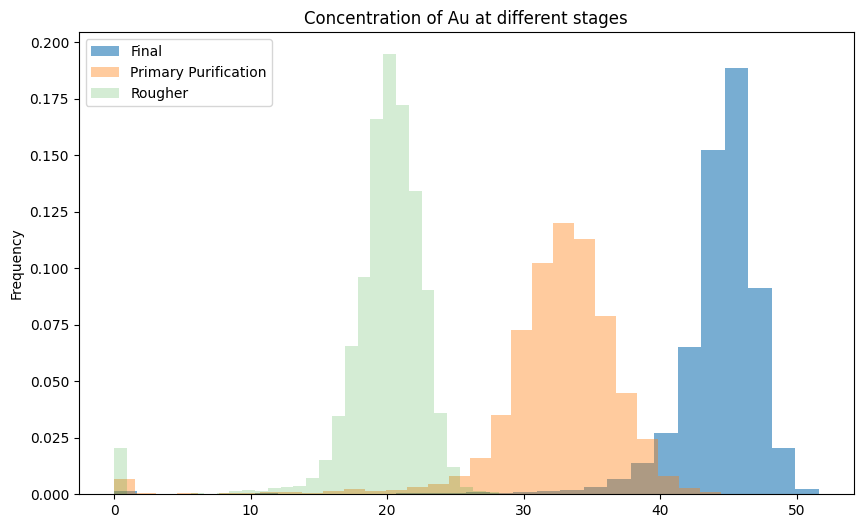

In [8]:
# Concentrations of metals Au changing depending on the purification stage

plt.figure(figsize=(10, 6))
training_data['final.output.concentrate_au'].plot( kind='hist',
                                                    title = 'Concentration of Au at different stages',
                                                    ylabel = 'Frequency',
                                                    xlabel = 'Concentration',
                                                    bins = 30,
                                                    alpha = 0.6,
                                                    density = True
                                                 )
training_data['primary_cleaner.output.concentrate_au'].plot( kind='hist',
                                                    bins = 30,
                                                    alpha = 0.4,
                                                    density = True
                                                           )
training_data['rougher.output.concentrate_au'].plot( kind='hist',
                                                    bins = 30,
                                                    alpha = 0.2,
                                                    density = True
                                                           )
plt.legend(['Final', 'Primary Purification', 'Rougher'])
plt.show()


For gold (Au), the concentration in the initial rougher stage is much lower, then as the purification process is done the concentration increases with the highest concentration being in in the final output.

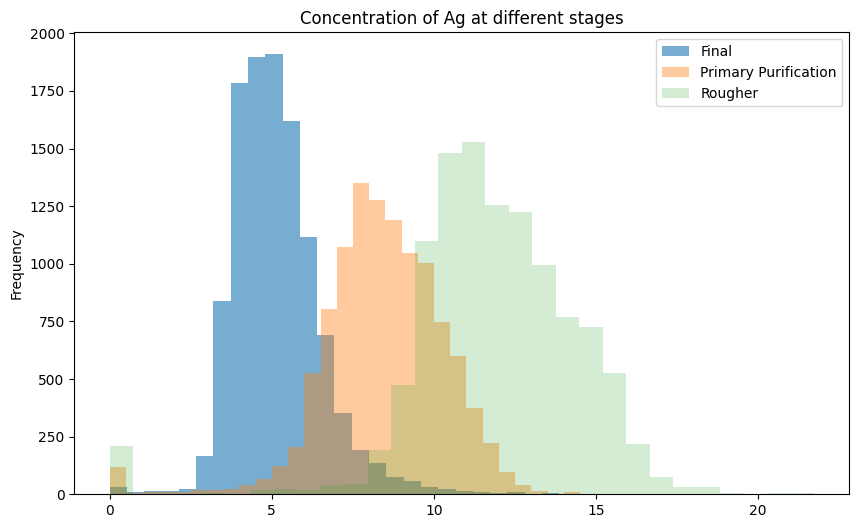

In [10]:
# Concentrations of metals Ag changing depending on the purification stage

plt.figure(figsize=(10, 6))
training_data['final.output.concentrate_ag'].plot( kind='hist',
                                                    title = 'Concentration of Ag at different stages',
                                                    ylabel = 'Frequency',
                                                    xlabel = 'Concentration',
                                                    bins = 30,
                                                    alpha = 0.6,
                                                    density = True
                                                 )
training_data['primary_cleaner.output.concentrate_ag'].plot( kind='hist',
                                                    bins = 30,
                                                    alpha = 0.4,
                                                    density = True
                                                           )
training_data['rougher.output.concentrate_ag'].plot( kind='hist',
                                                    bins = 30,
                                                    alpha = 0.2,
                                                    density = True
                                                           )
plt.legend(['Final', 'Primary Purification', 'Rougher'])
plt.show()

Silver (Ag) had an opposite trend from gold, the initial rougher stage had a lot more concentration of silver, but it decreased along with the purification process in the final output.

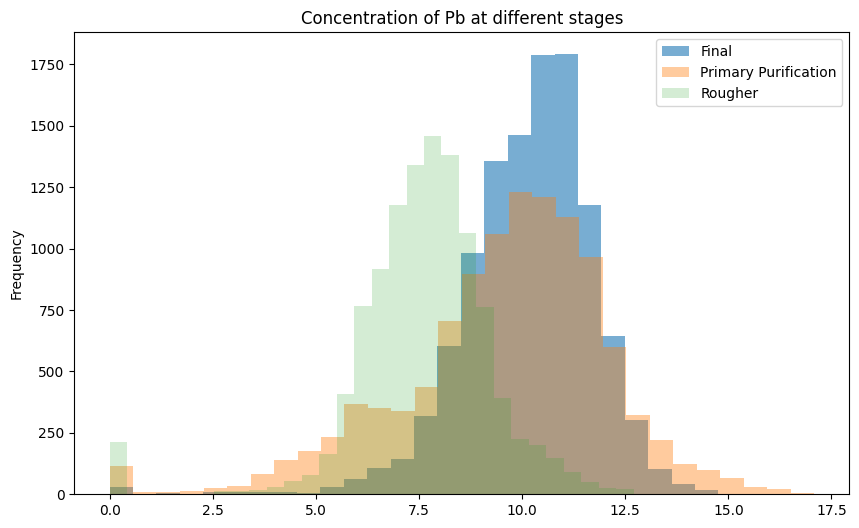

In [11]:
# Concentrations of metals Pb changing depending on the purification stage

plt.figure(figsize=(10, 6))
training_data['final.output.concentrate_pb'].plot( kind='hist',
                                                    title = 'Concentration of Pb at different stages',
                                                    ylabel = 'Frequency',
                                                    xlabel = 'Concentration',
                                                    bins = 30,
                                                    alpha = 0.6,
                                                    density = True
                                                 )
training_data['primary_cleaner.output.concentrate_pb'].plot( kind='hist',
                                                    bins = 30,
                                                    alpha = 0.4,
                                                    density = True
                                                           )
training_data['rougher.output.concentrate_pb'].plot( kind='hist',
                                                    bins = 30,
                                                    alpha = 0.2,
                                                    density = True
                                                           )
plt.legend(['Final', 'Primary Purification', 'Rougher'])
plt.show()

Lead (Pb) had a somewhat similar trend as gold in terms of its concentration increasing throughout the purification stage, but the change was very subtle, and there wasn't s significant change in concentration from the primary purification stage to the final output.

### Feed Particle Size Distribution

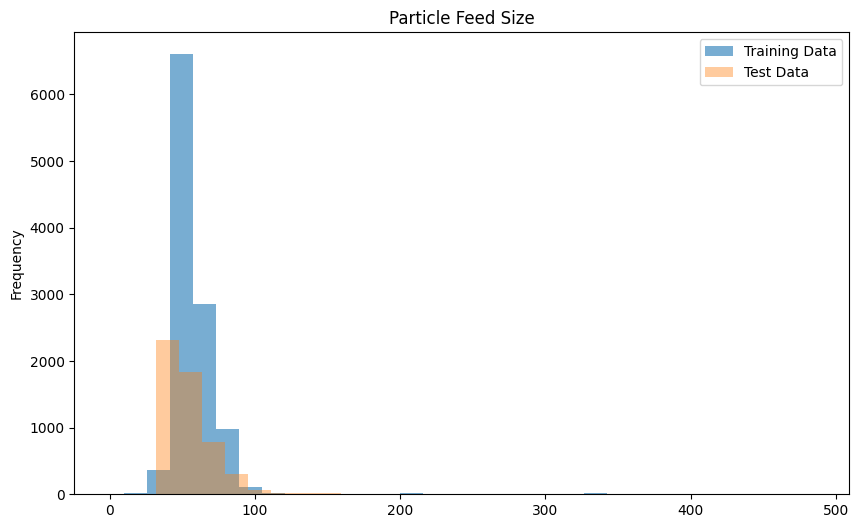

In [12]:
# Feed Particle Size Distribution in Training Set and Test Set

plt.figure(figsize=(10, 6))
training_data['rougher.input.feed_size'].plot( kind='hist',
                                                title = 'Particle Feed Size',
                                                ylabel = 'Frequency',
                                                xlabel = 'Particle Size',
                                                bins = 30,
                                                alpha = 0.6,
                                                density = True
                                                 )
test_data['rougher.input.feed_size'].plot( kind='hist',
                                            bins = 30,
                                            alpha = 0.4,
                                            density = True
                                            )
plt.legend(['Training Data','Test Data'])
plt.show()


The particle feed size distribution seems very similar for the test and training set. There are however a lot of values greater than 100 that are not so easily seen on the above graph, so they are analyzed separately below.

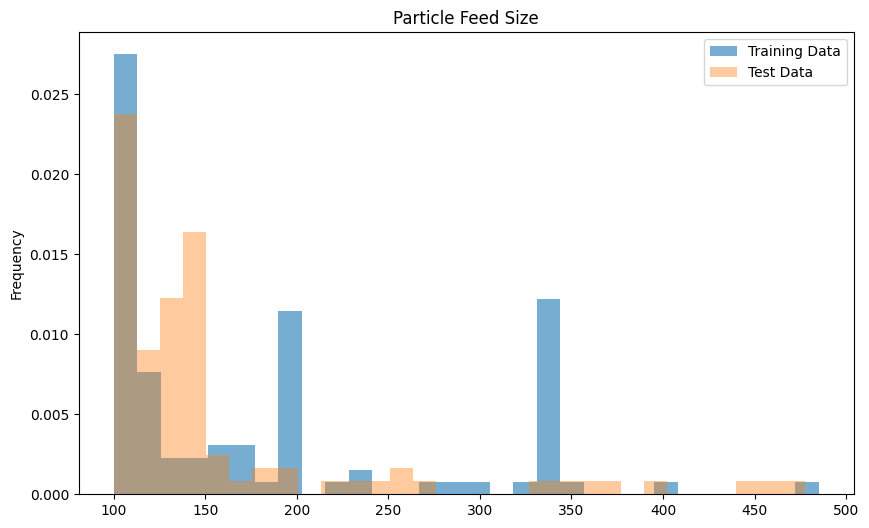

In [9]:
# Check for values greater than 100 for different distributions as that's not so obvious in the above graph 

plt.figure(figsize=(10, 6))
training_data['rougher.input.feed_size'][training_data['rougher.input.feed_size']>100].plot( kind='hist',
                                                title = 'Particle Feed Size',
                                                ylabel = 'Frequency',
                                                xlabel = 'Particle Size',
                                                bins = 30,
                                                alpha = 0.6,
                                                density = True
                                                 )
test_data['rougher.input.feed_size'][test_data['rougher.input.feed_size']>100].plot( kind='hist',
                                            bins = 30,
                                            alpha = 0.4,
                                            density = True
                                            )
plt.legend(['Training Data','Test Data'])
plt.show()


### Remove Anomalies from Concentration data

/tmp/ipykernel_32/1514993167.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training_data['total_concentration'] = training_data[['rougher.input.feed_au', 'rougher.input.feed_ag', 'rougher.input.feed_pb']].sum(axis=1)


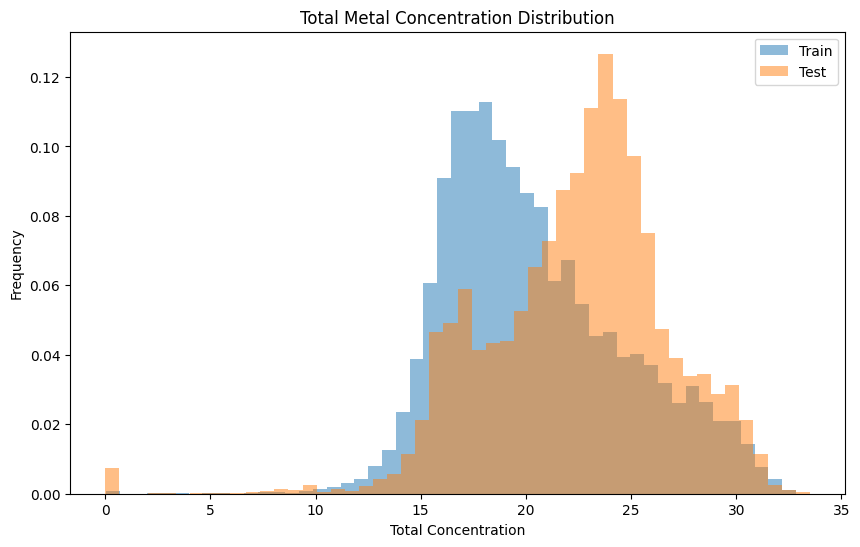

In [11]:
# Remove anomalies from concentration data

training_data['total_concentration'] = training_data[['rougher.input.feed_au', 'rougher.input.feed_ag', 'rougher.input.feed_pb']].sum(axis=1)
test_data['total_concentration'] = test_data[['rougher.input.feed_au', 'rougher.input.feed_ag', 'rougher.input.feed_pb']].sum(axis=1)

plt.figure(figsize=(10, 6))
plt.hist(training_data['total_concentration'], bins=50, alpha=0.5, label='Train', density = True)
plt.hist(test_data['total_concentration'], bins=50, alpha=0.5, label='Test', density = True)
plt.title('Total Metal Concentration Distribution')
plt.xlabel('Total Concentration')
plt.ylabel('Frequency')
plt.legend()
plt.show()


There do not seem to be any anomalies or abnormal values when looking at the above figure. There is some data with 0 value as the concentration but that's not exactly abnormal. To make sure any anomalies are taken care of, values outside the 99 percentile are removed below.

In [15]:
# Removing anomalies outside the 99 percentile threshold 
threshold = training_data['total_concentration'].quantile(0.99) 

training_data_cleaned = training_data[training_data['total_concentration'] < threshold]
test_data_cleaned = test_data[test_data['total_concentration'] < threshold]
training_data_cleaned.sample(10)

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,calculated_recovery,total_concentration
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980,87.107763,14.871440
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184,86.843261,14.905729
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363,86.842308,14.638299
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129,87.226430,14.199305
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691,86.688794,13.511497
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16855,2018-08-18 06:59:59,3.224920,11.356233,6.803482,46.713954,73.755150,8.769645,3.141541,10.403181,1.529220,...,20.007571,-499.740028,18.006038,-499.834374,13.001114,-500.155694,20.007840,-501.296428,89.574376,16.045275
16856,2018-08-18 07:59:59,3.195978,11.349355,6.862249,46.866780,69.049291,8.897321,3.130493,10.549470,1.612542,...,20.035660,-500.251357,17.998535,-500.395178,12.954048,-499.895163,19.968498,-501.041608,87.724007,15.104931
16857,2018-08-18 08:59:59,3.109998,11.434366,6.886013,46.795691,67.002189,8.529606,2.911418,11.115147,1.596616,...,19.951231,-499.857027,18.019543,-500.451156,13.023431,-499.914391,19.990885,-501.518452,88.890579,14.515579
16858,2018-08-18 09:59:59,3.367241,11.625587,6.799433,46.408188,65.523246,8.777171,2.819214,10.463847,1.602879,...,20.054122,-500.314711,17.979515,-499.272871,12.992404,-499.976268,20.013986,-500.625471,89.858126,14.313448


## Model

In [16]:
# Function to calculate the final sMAPE value

def smape(y_true, y_pred):
    denominator = (np.abs(y_true) + np.abs(y_pred)) / 2
    smape_value = np.mean(np.abs(y_true - y_pred) / denominator) * 100
    return smape_value

def final_smape(y_true_rougher, y_pred_rougher, y_true_final, y_pred_final):
    smape_rougher = smape(y_true_rougher, y_pred_rougher)
    print(f"Rougher sMAPE: {smape_rougher}")
    
    smape_final = smape(y_true_final, y_pred_final)
    print(f"Final sMAPE: {smape_final}")
    
    final_smape_value = 0.25 * smape_rougher + 0.75 * smape_final
    print(f"Final sMAPE Value: {final_smape_value}")
    return final_smape_value



In [17]:
# Get the features for training data
features = test_data_cleaned.columns.values
training_features = training_data_cleaned[features]
training_features = training_features.drop(['date', 'total_concentration'], axis=1)

# Get the target for training data
target_rougher = training_data_cleaned['rougher.output.recovery']
target_final = training_data_cleaned['final.output.recovery']

In [ ]:
# Train different models. Evaluate them using cross-validation. 

models = {
    'RandomForest': RandomForestRegressor(random_state=12345),
    'LinearRegression': LinearRegression(),
    'DecisionTree': DecisionTreeRegressor(random_state=12345)
}

for name, model in models.items():
    scores = cross_val_score(model, training_features, target_final, cv=5, scoring='neg_mean_absolute_error')
    print(f"{name}: Mean Absolute Error = {-scores.mean()}")



From the above we can see that Linear Regression is the best model as it gives the lowest mean absolute error for the final output.

In [ ]:
# Pick the best model and test it using the test sample

# Fit model for rougher output recovery
model_rougher = LinearRegression()
model_rougher.fit(training_features, target_rougher)
y_pred_rougher = model_rougher.predict(training_features)

# Fit model for final output recovery
model_final = LinearRegression()
model_final.fit(training_features, target_final)
y_pred_final = model_final.predict(training_features)

print('sMAPE values using Training Set:')
smape_value = final_smape(target_rougher, y_pred_rougher, target_final, y_pred_final)



In [ ]:
# Need the rougher.output.recovery and final.output.recovery from the full set in the test set to get the sMAPE values

test_with_y_true = test_data_cleaned.merge(full_data[['date','rougher.output.recovery','final.output.recovery']], on='date', how='left')


# Check for any missing values of the recovery output values, then drop the data with missing values

print(test_with_y_true.isna().sum())
test_with_y_true = test_with_y_true.dropna()


In [ ]:
# Test using the test sample

test_features = test_with_y_true.drop(['date', 'total_concentration', 'rougher.output.recovery', 'final.output.recovery'], axis=1)

target_rougher_test = test_with_y_true['rougher.output.recovery']
target_final_test = test_with_y_true['final.output.recovery']

y_pred_test_rougher = model_rougher.predict(test_features)
y_pred_test_final = model_final.predict(test_features)

print('sMAPE values using Test Set:')
smape_value = final_smape(target_rougher_test, y_pred_test_rougher, target_final_test, y_pred_test_final)



## Conclusion


The test set of this dataset was missing some features that were present in the training set. Upon assessing it was noticed that these features missing were related to Silver (Ag) and Lead (Pb), so it didn't effect the prediction of gold mining. Therefore, these features were not used when training the model so the test set can be used by the model later.

The three models that were trained were Random Forest, Linear Regression, and Decision Tree Regressor. Linear Regression model was chosen as it had the lowest mean absolute error between the three models. The final sMAPE value with the chosen model was 7.744 for the training set, and 9.151 for the test set, showing it worked similarly on both.